<a href="https://colab.research.google.com/github/soaresedirlan/data_science/blob/master/panorama_COVID_19_parana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19  - Paraná


A doença do coronavírus (COVID-19) é uma doença infecciosa causada por um coronavírus recém-descoberto.

A maioria das pessoas que adoece em decorrência da COVID-19 apresentará sintomas leves a moderados e se recuperará sem tratamento especial.


<center><img alt="Colaboratory logo" width="100%" src="http://www.caxambu.mg.gov.br/v2/wp-content/uploads/2020/05/WhatsApp-Image-2020-05-15-at-10.16.43.jpeg"></center>


###Como se espalha:
O vírus que causa a COVID-19 é transmitido principalmente por meio de gotículas geradas quando uma pessoa infectada tosse, espirra ou exala. Essas gotículas são muito pesadas para permanecerem no ar e são rapidamente depositadas em pisos ou superfícies.

Você pode ser infectado ao inalar o vírus se estiver próximo de alguém que tenha COVID-19 ou ao tocar em uma superfície contaminada e, em seguida, passar as mãos nos olhos, no nariz ou na boca.

## Obtenção dos Dados

Os dados foram extraidos [neste link](https://github.com/wcota/covid19br), tive muita dificuldade para conseguir dados das cidades, em alguns lugares têm informação faltantes ou apenas do brasil e do mundo.

O portal da transparêcia sobre covid-19 do paraná é bem completo,
tem muita informação que dificilmente encontramos na internet, o legal que fica tudo centralizado: [link site](http://www.coronavirus.pr.gov.br/Campanha/Pagina/TRANSPARENCIA-Enfrentamento-ao-Coronavirus-4)


### Dicionário de Variáveis

####Cidades
* Country = Pais
* State = Estado
* City = Cidade
* ibgeID = Código IBGE
* deaths = Nr. Mortos
* totalCases = Nr. Casos
* deaths_per_100k_inhabitants = Nr. Mortos por cada 100 mil habitantes
* totalCases_per_100k_inhabitants = Nr. Casos por cada 100 mil habitantes
* deaths_by_totalCases Porcentagem Mortes por casos
* date = Data 
* newCases = Novos Casos
* newDeaths = Novas Mortes

####Localização
* ibgeID = Código IBGE
* lat = Latitude
* lon = Longitude
* longName = Nome da Localziação


### Importando os dados do COVID-19

Você pode importar as cidades direto pelo link: [https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv](https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv).




E a localização pelo link : 
[https://raw.githubusercontent.com/wcota/covid19br/master/gps_cities.csv](https://raw.githubusercontent.com/wcota/covid19br/master/gps_cities.csv)


Usaremos o formato `csv` neste projeto.



#Obs: Dt. Referência '17/06/2020'
    


In [66]:
# importar as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# importar os dataset COVID-19 Brasil e a localização.
covidbrasil = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities.csv')
localizacao = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/gps_cities.csv')



## Análise Exploratória dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.



In [48]:
# ver as 5 primeiras linhas covibrasil
covidbrasil.head()

,country,state,city,ibgeID,deaths,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,date,newCases,newDeaths
0,Brazil,GO,Abadia de Goiás/GO,5200050,0,22,0.000,250.76941,0.00000,SES,2020-06-17,0,0
1,Brazil,MG,Abadia dos Dourados/MG,3100104,0,5,0.000,71.54099,0.00000,SES,2020-06-17,0,0
2,Brazil,GO,Abadiânia/GO,5200100,0,26,0.000,129.72757,0.00000,SES,2020-06-17,0,0
3,Brazil,PA,Abaetetuba/PA,1500107,81,2180,51.364,1382.38912,0.03716,SES,2020-06-17,0,0
4,Brazil,MG,Abaeté/MG,3100203,0,1,0.000,4.30348,0.00000,SES,2020-06-17,0,0


In [51]:
# ver as 5 primeiras linhas localização
localizacao.head()

,ibgeID,id,lat,lon,longName
0,2600054.0,Abreu e Lima/PE,-7.900719,-34.898389,"Abreu e Lima, Região Geográgica Imediata do Re..."
1,2600104.0,Afogados da Ingazeira/PE,-7.750429,-37.635638,"Afogados da Ingazeira, Microrregião de Pajeú, ..."
2,2600203.0,Afrânio/PE,-8.519892,-41.007020,"Afrânio, Região Geográfica Imediata de Petroli..."
3,2600302.0,Agrestina/PE,-8.455802,-35.944266,"Agrestina, Região Geográfica Imediata de Carua..."
4,2600401.0,Água Preta/PE,-8.707911,-35.519859,"Água Preta, Microrregião da Mata Meridional Pe..."


In [64]:
# ver a quantidade de entradadas e variáveis
print("Nr. Entradas Covid Brasil: \t {}".format(covidbrasil.shape[0]))
print("Nr. Variáveis Covid Brasil: \t {}".format(covidbrasil.shape[1]))
print('\t')
print("Nr. Entradas Localização: \t {}".format(localizacao.shape[0]))
print("Nr. Variáveis Localização: \t {}".format(localizacao.shape[1]))

Nr. Entradas Covid Brasil: 	 4815
Nr. Variáveis Covid Brasil: 	 13
	
Nr. Entradas Localização: 	 5596
Nr. Variáveis Localização: 	 5


In [56]:
# nome das variáveis covidBbrasil
covidbrasil.columns

Index(['country', 'state', 'city', 'ibgeID', 'deaths', 'totalCases',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', '_source', 'date', 'newCases', 'newDeaths'],
      dtype='object')

In [57]:
# nome das variáveis localizacao
localizacao.columns

Index(['ibgeID', 'id', 'lat', 'lon', 'longName'], dtype='object')

In [58]:
# ver tipo das variáveis covidbrasil
covidbrasil.dtypes

country                             object
state                               object
city                                object
ibgeID                               int64
deaths                               int64
totalCases                           int64
deaths_per_100k_inhabitants        float64
totalCases_per_100k_inhabitants    float64
deaths_by_totalCases               float64
_source                             object
date                                object
newCases                             int64
newDeaths                            int64
dtype: object

In [59]:
# ver tipo das variáveis localizacao
localizacao.dtypes

ibgeID      float64
id           object
lat         float64
lon         float64
longName     object
dtype: object

Agora vou filtrar apenas o estado do Paraná e unir os dados com localização e pegar as variáveis `LAT` e `LON`, mas como podemos ver, os tipos de dados da variável que vamos fazer o merge 'ibgeID' estão diferentes, para corrigir vamos mudar o tipo das duas variáveis para 'obJect'.


In [6]:
# filtrar dados do parana
covidpr = covidbrasil.loc[covidbrasil.state == "PR"].copy()

# mudar tipo da variável para 'object'
covidpr.ibgeID = covidpr.ibgeID.astype('object')
localizacao.ibgeID = localizacao.ibgeID.astype('object')

In [7]:
# unir os dados covidpr com localziacão

covidpr = pd.merge(covidpr[['date', 'state', 'ibgeID', 'city', 'totalCases', 'deaths' ]],
                   localizacao[['ibgeID', 'lat', 'lon']],
                   on='ibgeID')
  

In [100]:
# ver os dados depois de unir
covidpr.head() 

,date,state,ibgeID,city,totalCases,deaths,lat,lon
0,2020-06-17,PR,4100103,Abatiá/PR,18,0,-23.305297,-50.310253
1,2020-06-17,PR,4100202,Adrianópolis/PR,16,0,-24.655786,-48.991277
2,2020-06-17,PR,4100301,Agudos do Sul/PR,16,0,-25.989081,-49.332817
3,2020-06-17,PR,4100400,Almirante Tamandaré/PR,52,0,-25.313305,-49.299784
4,2020-06-17,PR,4100459,Altamira do Paraná/PR,1,0,-24.799114,-52.712863


In [101]:
# ver a quantidade de entradadas e variaveis
print("Nr. Entradas Covid PR: \t {}".format(covidpr.shape[0]))
print("Nr. Variáveis Covid PR: \t {}".format(covidpr.shape[1]))

Nr. Entradas Covid PR: 	 311
Nr. Variaveis Covid PR: 	 8


In [161]:
# ver os tipos de dados para podermos fazer as demais alterações
covidpr.dtypes 

date          datetime64[ns]
state                 object
ibgeID                object
city                  object
totalCases             int64
deaths                 int64
lat                   object
lon                   object
dtype: object

In [8]:
# mudar tipo de dados da variavel date 
covidpr.date = pd.to_datetime(covidpr.date)


In [233]:
# analise estatistica das variáveis.
covidpr.describe()

,totalCases,deaths
count,311.000000,311.000000
mean,33.945338,1.170418
std,140.342876,5.652852
min,0.000000,0.000000
25%,3.000000,0.000000
50%,8.000000,0.000000
75%,19.500000,1.000000
max,1898.000000,83.000000


In [160]:
# identificar valores ausentes
covidpr.isnull().sum()

#(covidpr.isnull().sum() / covidpr.shape[0]).sort_values(ascending=False)

date          0
state         0
ibgeID        0
city          0
totalCases    0
deaths        0
lat           0
lon           0
dtype: int64

Não temos valores ausentes.

Plotar um gráfico de barras para os 5 cidades com mais casos

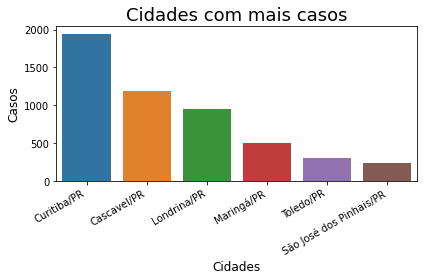

In [67]:
top5 = covidpr[['city', 'totalCases']].sort_values(by='totalCases', ascending=False)[0:6]
fig, ax = plt.subplots()

g = sns.barplot(x="city", y="totalCases", data=top5)
g.axes.set_title('Cidades com mais casos', fontsize=18,color="black",alpha=2)
g.set_xlabel("Cidades", size = 12,color="black")
g.set_ylabel("Casos", size = 12,color="black")



fig.autofmt_xdate()

plt.tight_layout()


Plotar um gráfico de barras para os 5 cidades com mais mortes

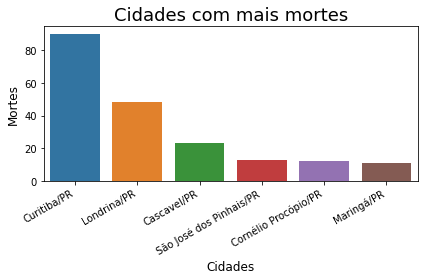

In [68]:

top5 = covidpr[['city', 'deaths']].sort_values(by='deaths', ascending=False)[0:6]
fig, ax = plt.subplots()


g = sns.barplot(x="city", y="deaths", data=top5)
g.axes.set_title('Cidades com mais mortes', fontsize=18,color="black",alpha=2)
g.set_xlabel("Cidades", size = 12,color="black")
g.set_ylabel("Mortes", size = 12,color="black")


fig.autofmt_xdate()

plt.tight_layout()

Agora vou plotar um mapa com as cidades e número de casos e mortes

In [9]:
# instalar biblioteca

pip install folium -q

In [38]:
# importar biblioteca
from folium import plugins
import folium

In [39]:
# interar cordenadas para poder pegar de todas cidades.
cordenadas = []
for lat, lon in zip(covidpr.lat.values[:50000], covidpr.lon.values[:50000]):
                    cordenadas.append([lat, lon])

In [80]:
#Plotar a base do mapa e adicionar as cordenadas
mapa = folium.Map(
    width='100%',
    height='100%',
    location=[-25.429596, -49.271272],
    zoom_start=7).add_child(plugins.HeatMap(cordenadas))

In [81]:
# colocar nome cidade, casos e mortes na caixa de no tooltip 

for i in range(0, len(covidpr)):
  folium.Circle(
     location =  [covidpr.iloc[i]['lat'], covidpr.iloc[i]['lon']],
     color = '#00FF69',
     fill = '#00A1B3',
     tooltip = '<li><bold> Cidade: ' + str(covidpr.iloc[i]['city']) + '</bold></li>' + 
               '<li><bold> Casos: ' + str(covidpr.iloc[i]['totalCases']) + '</bold></li>' + 
               '<li><bold> Mortes: ' + str(covidpr.iloc[i]['deaths']) + '</bold></li>',
     radius = (covidpr.iloc[i]['totalCases']*1.1)
  ).add_to(mapa)


In [82]:
# mostrar o mapa
mapa

## Conclusão

Por essa breve análise podemos ver que curitiba é a cidade com mais casos e mortes.

Tambem podemos perceber que o numero de casos já se espalhou completamente pelo Paraná inteiro.

Obs: Dependendo da cidade pode ter mais casos só que com menos morte e vice versa,
pois uma cidade pode testar mais e a outra menos, pode ter pesssoas mais velhas, com problemas de saude, etc.

